In [15]:
import time
import pandas as pd
from IPython.display import display_html
from matplotlib import pyplot as plt

## load image

In [16]:
import numpy as np
import os
import PIL
from PIL import Image, ImageOps
PIL.Image.MAX_IMAGE_PIXELS = 933120000

cached_img_load = {}

def get_files(name,path):
    if not os.path.isdir(path):
        return [(name,path)]
    else:
        targets = [
            f for f in os.listdir(path) if not os.path.isdir(os.path.join(path, f))
        ]
        return [
            (name + '/' + f, os.path.join(path, f)) for f in targets
        ]

def load_image(name,path):
    try:
        image = Image.open(path)
        # https://stackoverflow.com/questions/63947990/why-are-width-and-height-of-an-image-are-inverted-when-loading-using-pil-versus
        image = ImageOps.exif_transpose(image)

        img = np.array(image.convert('RGB'))
        dpi = image.info.get("dpi")

        print("name: ", name, 'dpi:', dpi)

        cached_img_load[name] = (img,dpi)
    except Exception as e:
        print("skip: ", path)

In [17]:
files = get_files("images", os.path.abspath("../images/hough-transform"))
for n,f in files:
    load_image(n,f)

name:  images/4.jpg dpi: (72, 72)
name:  images/4N5cBcvldd0hhjwI6EJqoA.png dpi: None
name:  images/broder.png dpi: None
name:  images/doc.png dpi: None


## preprocess image

name:  images/4.jpg time:  0.952421 seconds
name:  images/4N5cBcvldd0hhjwI6EJqoA.png time:  0.046658 seconds
name:  images/broder.png time:  0.001000 seconds
name:  images/doc.png time:  0.028852 seconds


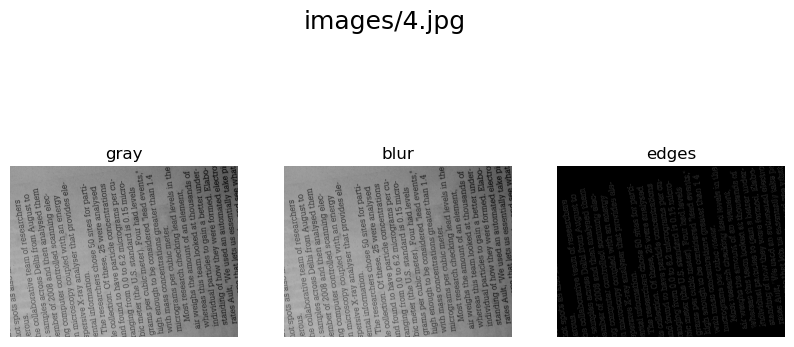

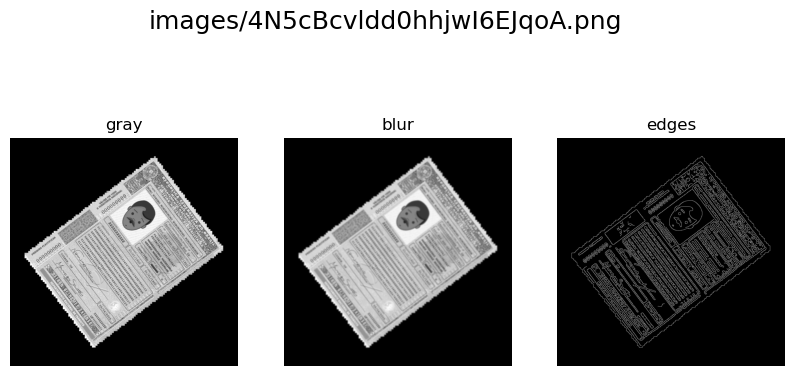

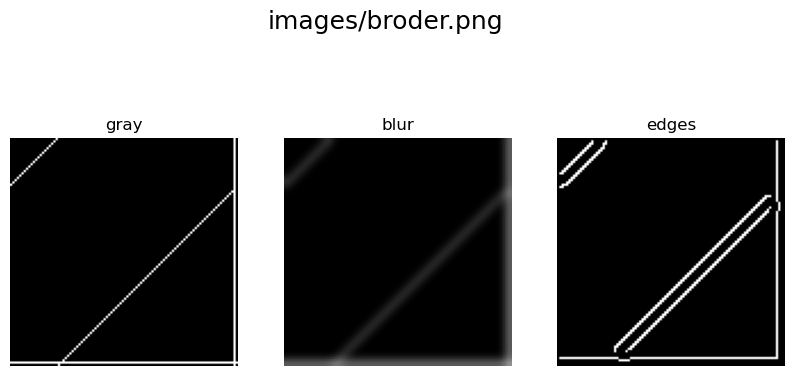

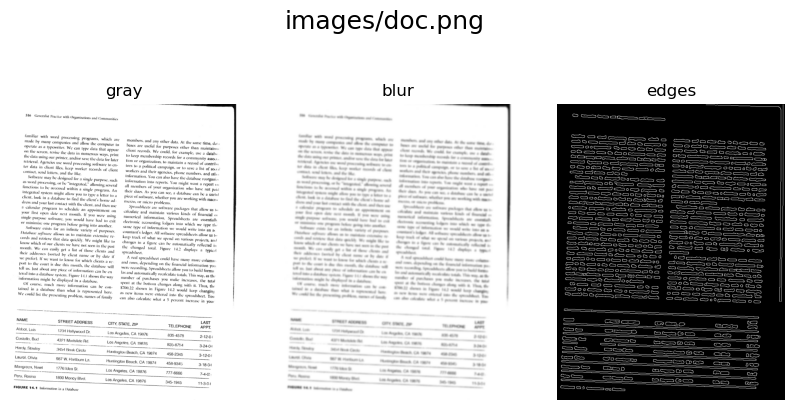

In [18]:
import cv2
from skimage.feature import canny

cached_img_preprocess = {}

for name,(img,_) in cached_img_load.items():
    start = time.time()

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(11,11),0)
    edges = canny(blur)

    end = time.time()
    cached_img_preprocess[name] = edges


    print("name: ", name, "time: ", "{:.6f} seconds".format(end - start))

    # show the output image
    edges_gray = np.vectorize(lambda x: 255 if x else 0, otypes=[np.uint8])(edges)
    imgs_show = [
        ("gray", gray),
        ("blur", blur),
        ("edges", edges_gray),
    ]
    fig = plt.figure(figsize=(10,5))
    fig.suptitle(name, fontsize=18)
    gs = fig.add_gridspec(1,len(imgs_show))
    for idx, (name,img) in enumerate(imgs_show):
        if img is None: continue
        ax = fig.add_subplot(gs[0, idx])
        ax.set_title(name)
        ax.axis('off')
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## hough transform

name:  images/4.jpg time: 0.169061 seconds
name:  images/4N5cBcvldd0hhjwI6EJqoA.png time: 0.020752 seconds
name:  images/broder.png time: 0.000000 seconds
name:  images/doc.png time: 0.016325 seconds


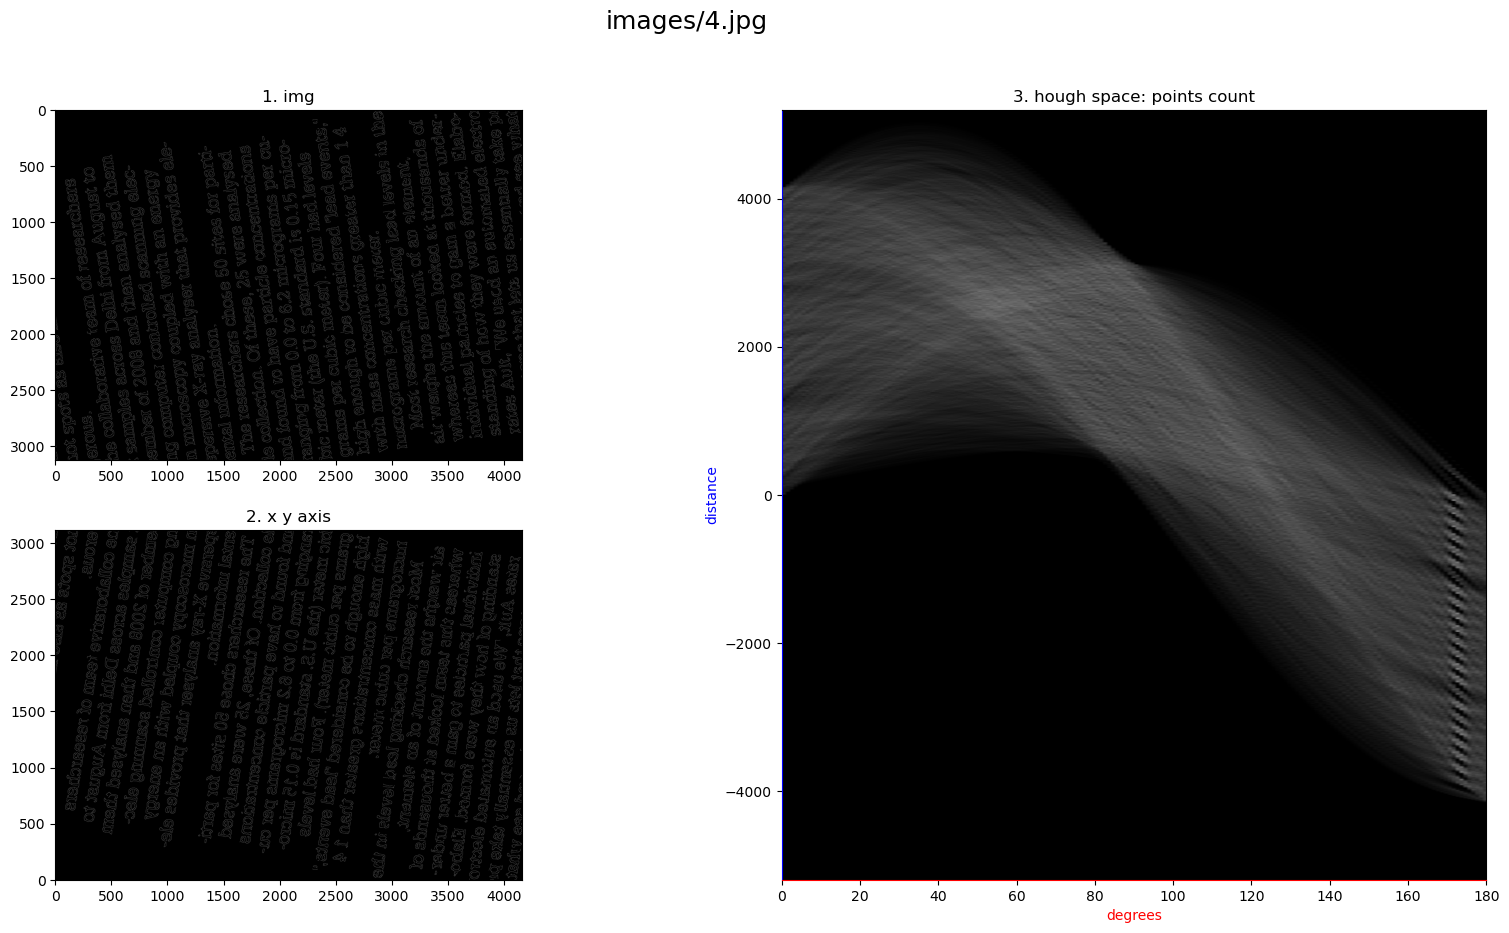

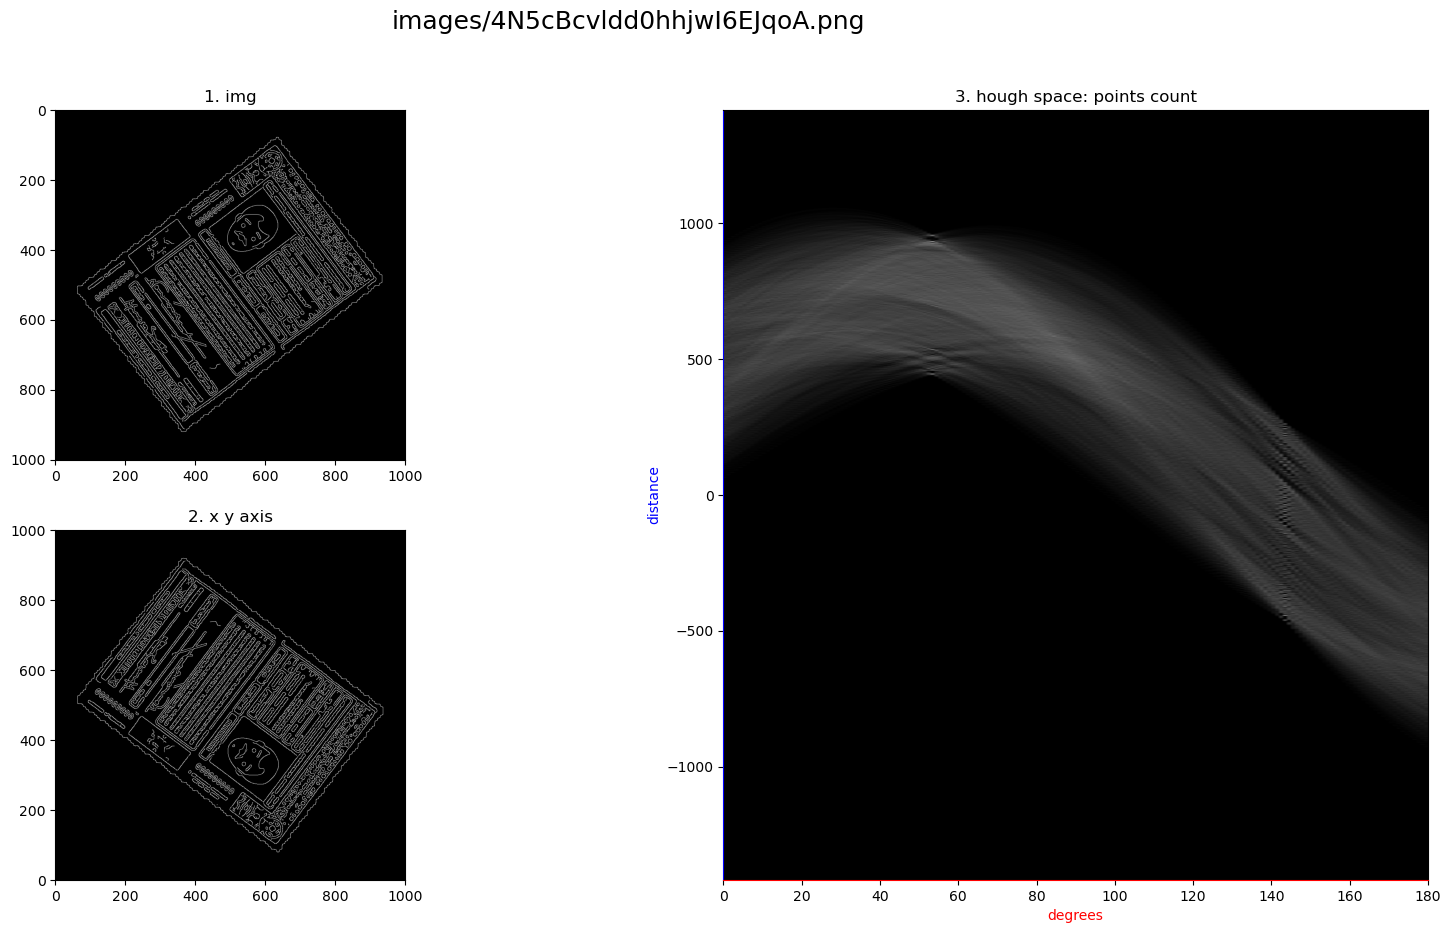

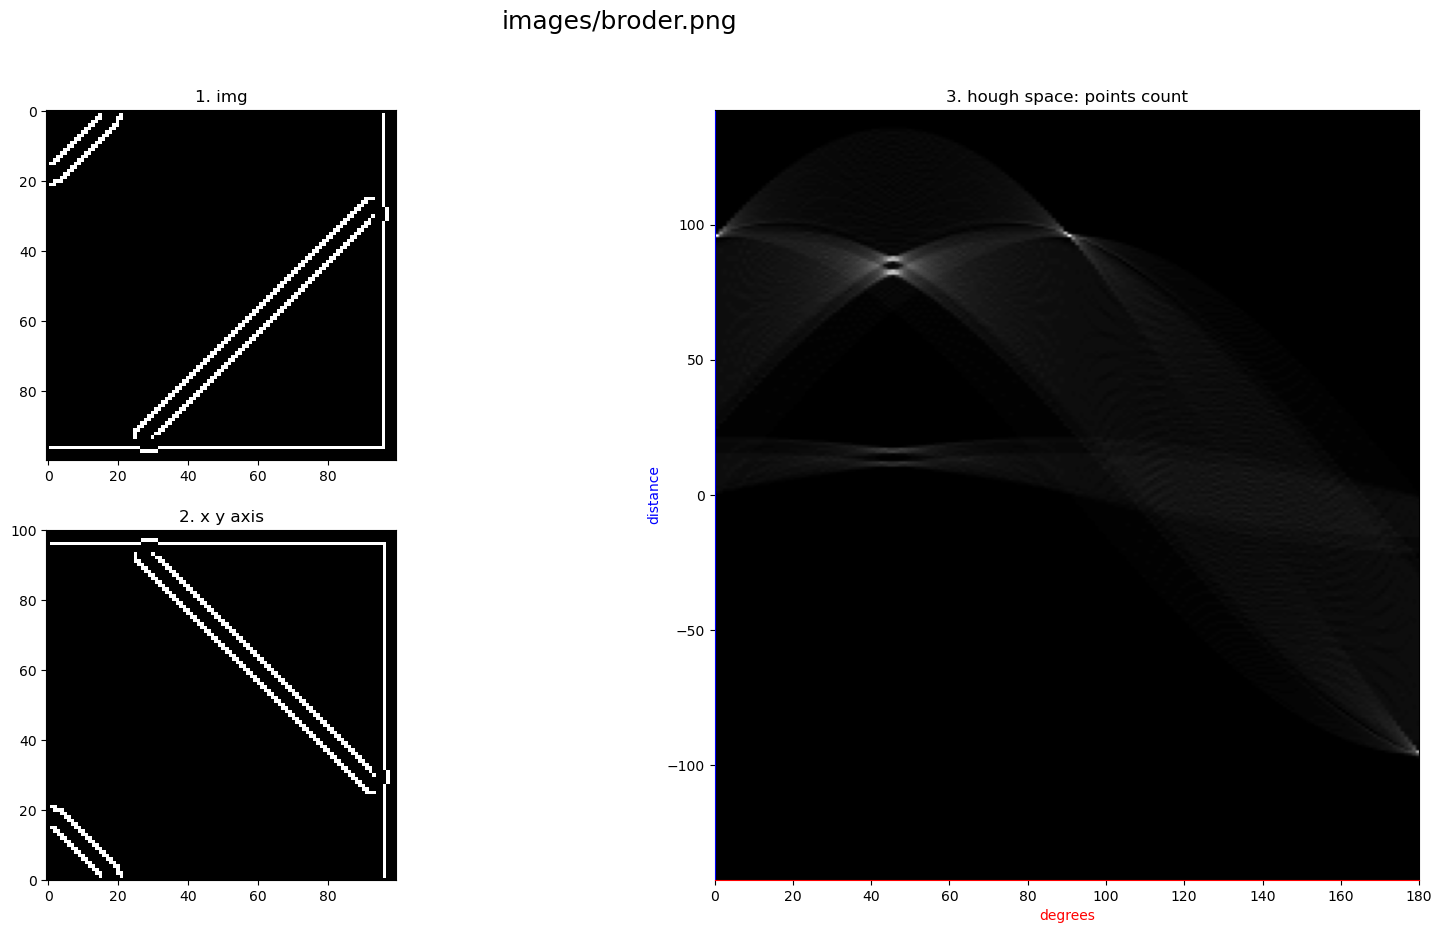

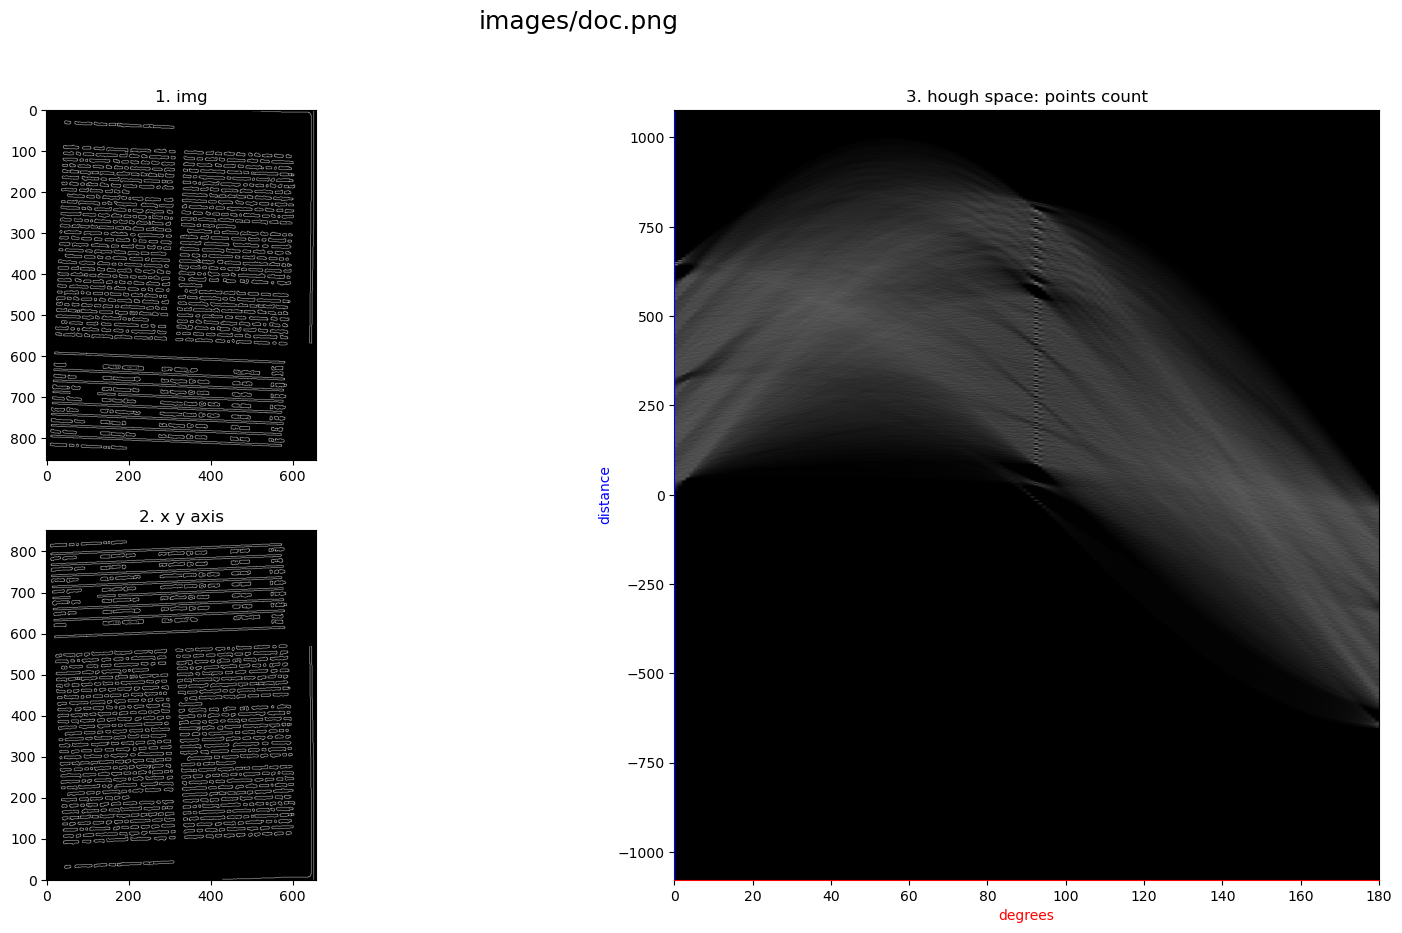

In [19]:
from skimage.transform import hough_line

cached_hough_space = {}

for name,img in cached_img_preprocess.items():
    start = time.time()

    tested_angles = np.deg2rad(np.arange(0.1, 180.0))
    h, theta, d = hough_line(img, theta=tested_angles)

    end = time.time()
    cached_hough_space[name] = (h, theta, d)


    print("name: ", name, "time:", "{:.6f} seconds".format(end - start))

    fig = plt.figure(figsize=(20,10))
    fig.suptitle(name, fontsize=18)
    gs = fig.add_gridspec(2,2)

    ax = fig.add_subplot(gs[0,0])
    ax.set_title(f"1. img")
    ax.imshow(img, cmap="gray")

    ax = fig.add_subplot(gs[1,0])
    ax.set_title(f"2. x y axis")
    ax.set_ylim(0, img.shape[0])
    ax.imshow(img, cmap="gray")
    
    ax = fig.add_subplot(gs[:,1])
    ax.set_title(f"3. hough space: points count")
    ax.set_xlabel("degrees")
    ax.set_ylabel("distance")
    ax.spines['left'].set_color('blue')
    ax.yaxis.label.set_color('blue')
    ax.spines['bottom'].set_color('red')
    ax.xaxis.label.set_color('red')
    ax.imshow(np.flip(h, axis=0), cmap="gray", aspect='auto', extent=[0, 180, - h.shape[0] / 2, h.shape[0] / 2])

## most angle

name:  images/4.jpg time:  1716712364.507578 seconds


peak 100 use threshold: 215 most_common_angle: [3.] 
 
 
   
 accum 
 angles 
 dists 
 classified 
 
 
 
 
 0 
 430 
 3.003712 
 -1844.000000 
 normal 
 
 
 1 
 370 
 2.986258 
 -77.000000 
 normal 
 
 
 2 
 355 
 3.003712 
 -1673.000000 
 normal 
 
 
 3 
 331 
 3.003712 
 -1764.000000 
 normal 
 
 
 4 
 325 
 3.003712 
 -2014.000000 
 normal 
 
 
 5 
 268 
 2.986258 
 -254.000000 
 normal 
 
 
 6 
 268 
 3.003712 
 -1934.000000 
 normal 
 
 
 7 
 268 
 3.003712 
 -2004.000000 
 normal 
 
 
 8 
 266 
 2.986258 
 -172.000000 
 normal 
 
 
 9 
 262 
 3.003712 
 -2184.000000 
 normal 
 
 
 10 
 259 
 3.003712 
 -1499.000000 
 normal 
 
 
 11 
 259 
 3.003712 
 -1592.000000 
 normal 
 
 
 12 
 258 
 2.986258 
 -5.000000 
 normal 
 
 
 13 
 252 
 2.986258 
 8.000000 
 normal 
 
 
 14 
 251 
 1.589995 
 2771.000000 
 normal 
 
 
 15 
 250 
 2.986258 
 -599.000000 
 normal 
 
 
 16 
 243 
 3.021165 
 -3747.000000 
 normal 
 
 
 17 
 242 
 2.986258 
 -423.000000 
 normal 
 
 
 18 
 242 
 3.003712 
 -2351.000000 
 normal 
 
 
 19 
 240 
 3.003712 
 -2521.000000 
 normal 
 
 
 20 
 239 
 1.520182 
 2923.000000 
 normal 
 
 
 21 
 239 
 1.467822 
 2839.000000 
 normal 
 
 
 22 
 239 
 3.003712 
 -2104.000000 
 normal 
 
 
 23 
 239 
 3.021165 
 -3407.000000 
 normal 
 
 
 24 
 239 
 3.021165 
 -3577.000000 
 normal 
 
 
 25 
 238 
 3.021165 
 -3236.000000 
 normal 
 
 
 26 
 237 
 3.003712 
 -806.000000 
 normal 
 
 
 27 
 237 
 3.003712 
 -3368.000000 
 normal 
 
 
 28 
 236 
 1.520182 
 2735.000000 
 normal 
 
 
 29 
 235 
 1.572542 
 2800.000000 
 normal 
 
 
 30 
 235 
 0.996583 
 2579.000000 
 normal 
 
 
 31 
 234 
 1.363102 
 2478.000000 
 normal 
 
 
 32 
 234 
 2.986258 
 -880.000000 
 normal 
 
 
 33 
 234 
 3.003712 
 -1253.000000 
 normal 
 
 
 34 
 234 
 3.021165 
 -3734.000000 
 normal 
 
 
 35 
 233 
 0.961676 
 2622.000000 
 normal 
 
 
 36 
 232 
 1.432915 
 2868.000000 
 normal 
 
 
 37 
 232 
 1.432915 
 2751.000000 
 normal 
 
 
 38 
 232 
 0.979130 
 2556.000000 
 normal 
 
 
 39 
 232 
 2.183407 
 78.000000 
 normal 
 
 
 40 
 232 
 3.003712 
 -2292.000000 
 normal 
 
 
 41 
 231 
 1.485275 
 2368.000000 
 normal 
 
 
 42 
 231 
 3.021165 
 -3173.000000 
 normal 
 
 
 43 
 230 
 0.926770 
 2752.000000 
 normal 
 
 
 44 
 230 
 1.607448 
 2175.000000 
 normal 
 
 
 45 
 230 
 1.781981 
 1877.000000 
 normal 
 
 
 46 
 230 
 1.555088 
 1786.000000 
 normal 
 
 
 47 
 230 
 1.520182 
 918.000000 
 normal 
 
 
 48 
 230 
 2.986258 
 -767.000000 
 normal 
 
 
 49 
 230 
 3.003712 
 -911.000000 
 normal 
 
 
 50 
 230 
 3.003712 
 -2451.000000 
 normal 
 
 
 51 
 230 
 3.021165 
 -2551.000000 
 normal 
 
 
 52 
 229 
 1.380555 
 2627.000000 
 normal 
 
 
 53 
 229 
 1.537635 
 942.000000 
 normal 
 
 
 54 
 229 
 3.003712 
 -2275.000000 
 normal 
 
 
 55 
 228 
 0.944223 
 2640.000000 
 normal 
 
 
 56 
 228 
 0.961676 
 2542.000000 
 normal 
 
 
 57 
 228 
 2.986258 
 -183.000000 
 normal 
 
 
 58 
 227 
 1.589995 
 2822.000000 
 normal 
 
 
 59 
 227 
 0.996583 
 2345.000000 
 normal 
 
 
 60 
 226 
 3.003712 
 -975.000000 
 normal 
 
 
 61 
 225 
 1.432915 
 2975.000000 
 normal 
 
 
 62 
 225 
 1.118756 
 2780.000000 
 normal 
 
 
 63 
 225 
 0.839503 
 2721.000000 
 normal 
 
 
 64 
 225 
 1.014036 
 2566.000000 
 normal 
 
 
 65 
 225 
 1.415462 
 1934.000000 
 normal 
 
 
 66 
 225 
 3.021165 
 -3342.000000 
 normal 
 
 
 67 
 224 
 0.909317 
 2763.000000 
 normal 
 
 
 68 
 224 
 3.003712 
 -629.000000 
 normal 
 
 
 69 
 224 
 2.986258 
 -1281.000000 
 normal 
 
 
 70 
 223 
 1.398009 
 2995.000000 
 normal 
 
 
 71 
 222 
 1.432915 
 3060.000000 
 normal 
 
 
 72 
 222 
 1.415462 
 3036.000000 
 normal 
 
 
 73 
 221 
 1.432915 
 2244.000000 
 normal 
 
 
 74 
 221 
 1.432915 
 1736.000000 
 normal 
 
 
 75 
 220 
 1.432915 
 3016.000000 
 normal 
 
 
 76 
 220 
 1.712168 
 2208.000000 
 normal 
 
 
 77 
 220 
 3.021165 
 -1863.000000 
 normal 
 
 
 78 
 220 
 3.021165 
 -3510.000000 
 normal 
 
 
 79 
 219 
 1.

name:  images/4N5cBcvldd0hhjwI6EJqoA.png time:  1716712364.687106 seconds


peak 26 use threshold: 192 most_common_angle: [2.5] 
 
 
   
 accum 
 angles 
 dists 
 classified 
 
 
 
 
 0 
 385 
 0.926770 
 927.000000 
 normal 
 
 
 1 
 355 
 2.497566 
 40.000000 
 normal 
 
 
 2 
 346 
 0.926770 
 535.000000 
 normal 
 
 
 3 
 345 
 2.497566 
 -367.000000 
 normal 
 
 
 4 
 339 
 2.497566 
 0.000000 
 normal 
 
 
 5 
 329 
 2.497566 
 -44.000000 
 normal 
 
 
 6 
 329 
 2.497566 
 -61.000000 
 normal 
 
 
 7 
 328 
 2.497566 
 -444.000000 
 normal 
 
 
 8 
 295 
 2.497566 
 107.000000 
 normal 
 
 
 9 
 292 
 2.497566 
 136.000000 
 normal 
 
 
 10 
 284 
 2.497566 
 -96.000000 
 normal 
 
 
 11 
 281 
 2.497566 
 -350.000000 
 normal 
 
 
 12 
 276 
 2.497566 
 -112.000000 
 normal 
 
 
 13 
 276 
 2.497566 
 -136.000000 
 normal 
 
 
 14 
 271 
 2.497566 
 245.000000 
 normal 
 
 
 15 
 271 
 2.497566 
 226.000000 
 normal 
 
 
 16 
 271 
 2.497566 
 195.000000 
 normal 
 
 
 17 
 261 
 0.926770 
 459.000000 
 normal 
 
 
 18 
 223 
 0.926770 
 699.000000 
 normal 
 
 
 19 
 218 
 0.926770 
 523.000000 
 normal 
 
 
 20 
 213 
 2.497566 
 -309.000000 
 normal 
 
 
 21 
 208 
 2.497566 
 19.000000 
 normal 
 
 
 22 
 205 
 2.497566 
 -71.000000 
 normal 
 
 
 23 
 202 
 2.497566 
 -186.000000 
 normal 
 
 
 24 
 197 
 2.497566 
 -275.000000 
 normal 
 
 
 25 
 195 
 2.497566 
 -411.000000 
 normal

name:  images/broder.png time:  1716712365.248138 seconds


peak 45 use threshold: 0 most_common_angle: [0.79] 
 
 
   
 accum 
 angles 
 dists 
 classified 
 
 
 
 
 0 
 92 
 0.001745 
 96.000000 
 border_right 
 
 
 1 
 91 
 1.572542 
 96.000000 
 normal 
 
 
 2 
 72 
 0.787143 
 83.000000 
 normal 
 
 
 3 
 24 
 0.787143 
 16.000000 
 normal 
 
 
 4 
 12 
 1.101303 
 13.000000 
 normal 
 
 
 5 
 10 
 2.218313 
 11.000000 
 normal 
 
 
 6 
 10 
 1.939061 
 6.000000 
 normal 
 
 
 7 
 10 
 2.515019 
 4.000000 
 normal 
 
 
 8 
 10 
 2.741912 
 1.000000 
 normal 
 
 
 9 
 10 
 2.235767 
 1.000000 
 normal 
 
 
 10 
 10 
 2.357940 
 -9.000000 
 normal 
 
 
 11 
 10 
 2.637192 
 -11.000000 
 normal 
 
 
 12 
 9 
 1.729621 
 10.000000 
 normal 
 
 
 13 
 9 
 1.973967 
 -4.000000 
 normal 
 
 
 14 
 9 
 2.846632 
 -10.000000 
 normal 
 
 
 15 
 8 
 1.886701 
 65.000000 
 normal 
 
 
 16 
 8 
 1.345649 
 52.000000 
 normal 
 
 
 17 
 8 
 0.211185 
 51.000000 
 normal 
 
 
 18 
 8 
 2.846632 
 -65.000000 
 normal 
 
 
 19 
 7 
 1.956514 
 54.000000 
 normal 
 
 
 20 
 7 
 2.078687 
 44.000000 
 normal 
 
 
 21 
 7 
 0.123918 
 13.000000 
 normal 
 
 
 22 
 7 
 2.654646 
 -53.000000 
 normal 
 
 
 23 
 6 
 2.183407 
 57.000000 
 normal 
 
 
 24 
 6 
 2.270673 
 46.000000 
 normal 
 
 
 25 
 6 
 1.799434 
 43.000000 
 normal 
 
 
 26 
 6 
 2.323033 
 35.000000 
 normal 
 
 
 27 
 6 
 0.036652 
 35.000000 
 normal 
 
 
 28 
 6 
 2.131047 
 32.000000 
 normal 
 
 
 29 
 6 
 2.357940 
 25.000000 
 normal 
 
 
 30 
 6 
 1.485275 
 10.000000 
 normal 
 
 
 31 
 6 
 2.218313 
 -24.000000 
 normal 
 
 
 32 
 6 
 2.497566 
 -26.000000 
 normal 
 
 
 33 
 6 
 2.724459 
 -32.000000 
 normal 
 
 
 34 
 6 
 2.392846 
 -36.000000 
 normal 
 
 
 35 
 6 
 2.986258 
 -38.000000 
 normal 
 
 
 36 
 6 
 2.637192 
 -42.000000 
 normal 
 
 
 37 
 5 
 1.101303 
 125.000000 
 normal 
 
 
 38 
 5 
 0.438078 
 120.000000 
 normal 
 
 
 39 
 4 
 0.787143 
 134.000000 
 normal 
 
 
 40 
 4 
 0.595157 
 132.000000 
 normal 
 
 
 41 
 4 
 0.909317 
 124.000000 
 normal 
 
 
 42 
 4 
 0.664970 
 121.000000 
 normal 
 
 
 43 
 4 
 0.944223 
 112.000000 
 normal 
 
 
 44 
 4 
 0.682424 
 109.000000 
 normal

name:  images/doc.png time:  1716712364.803375 seconds


peak 32 use threshold: 164 most_common_angle: [1.61] 
 
 
   
 accum 
 angles 
 dists 
 classified 
 
 
 
 
 0 
 328 
 0.001745 
 651.000000 
 border_right 
 
 
 1 
 255 
 1.607448 
 685.000000 
 normal 
 
 
 2 
 237 
 1.607448 
 766.000000 
 normal 
 
 
 3 
 234 
 1.607448 
 739.000000 
 normal 
 
 
 4 
 233 
 1.607448 
 631.000000 
 normal 
 
 
 5 
 230 
 1.607448 
 658.000000 
 normal 
 
 
 6 
 224 
 1.607448 
 712.000000 
 normal 
 
 
 7 
 223 
 1.607448 
 595.000000 
 normal 
 
 
 8 
 220 
 1.607448 
 797.000000 
 normal 
 
 
 9 
 211 
 1.607448 
 257.000000 
 normal 
 
 
 10 
 211 
 1.607448 
 148.000000 
 normal 
 
 
 11 
 207 
 1.607448 
 462.000000 
 normal 
 
 
 12 
 205 
 1.607448 
 133.000000 
 normal 
 
 
 13 
 201 
 1.607448 
 301.000000 
 normal 
 
 
 14 
 198 
 1.607448 
 168.000000 
 normal 
 
 
 15 
 196 
 1.607448 
 330.000000 
 normal 
 
 
 16 
 195 
 1.607448 
 491.000000 
 normal 
 
 
 17 
 195 
 1.607448 
 213.000000 
 normal 
 
 
 18 
 195 
 1.607448 
 109.000000 
 normal 
 
 
 19 
 193 
 1.607448 
 368.000000 
 normal 
 
 
 20 
 188 
 1.607448 
 427.000000 
 normal 
 
 
 21 
 188 
 1.607448 
 89.000000 
 normal 
 
 
 22 
 186 
 1.607448 
 477.000000 
 normal 
 
 
 23 
 186 
 1.607448 
 383.000000 
 normal 
 
 
 24 
 185 
 1.607448 
 344.000000 
 normal 
 
 
 25 
 183 
 1.607448 
 397.000000 
 normal 
 
 
 26 
 179 
 1.607448 
 529.000000 
 normal 
 
 
 27 
 175 
 1.607448 
 228.000000 
 normal 
 
 
 28 
 171 
 1.607448 
 183.000000 
 normal 
 
 
 29 
 170 
 1.607448 
 549.000000 
 normal 
 
 
 30 
 170 
 1.607448 
 514.000000 
 normal 
 
 
 31 
 168 
 1.607448 
 241.000000 
 normal

angle degree  rotation degree
images/4.jpg                          98.112661        81.887339
images/4N5cBcvldd0hhjwI6EJqoA.png    126.760551        53.239449
images/broder.png                     44.736334       135.263666
images/doc.png                       177.753795         2.246205

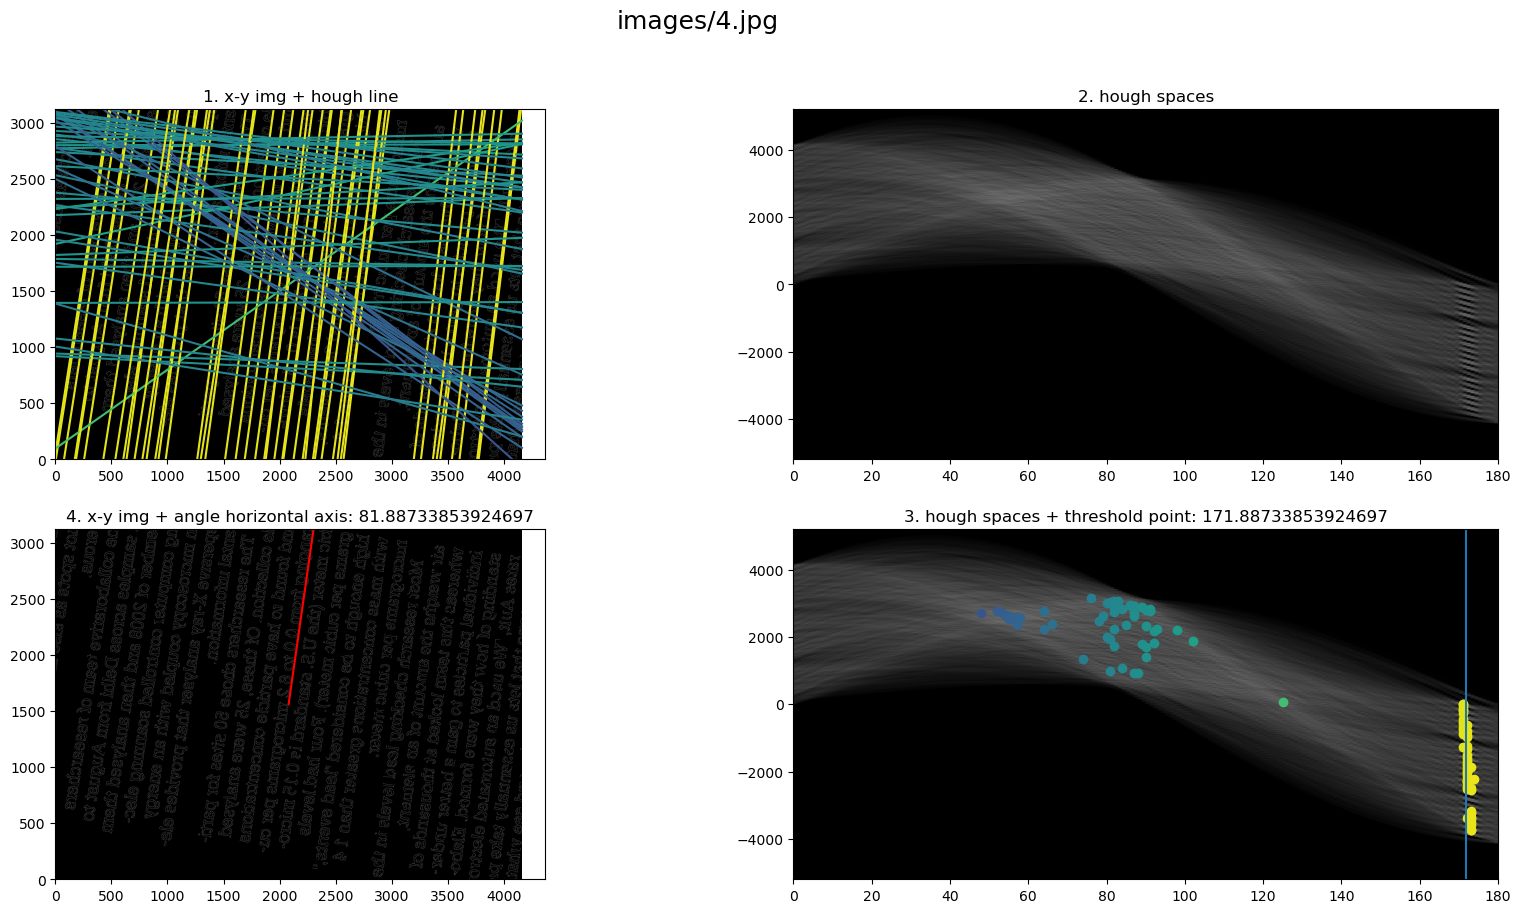

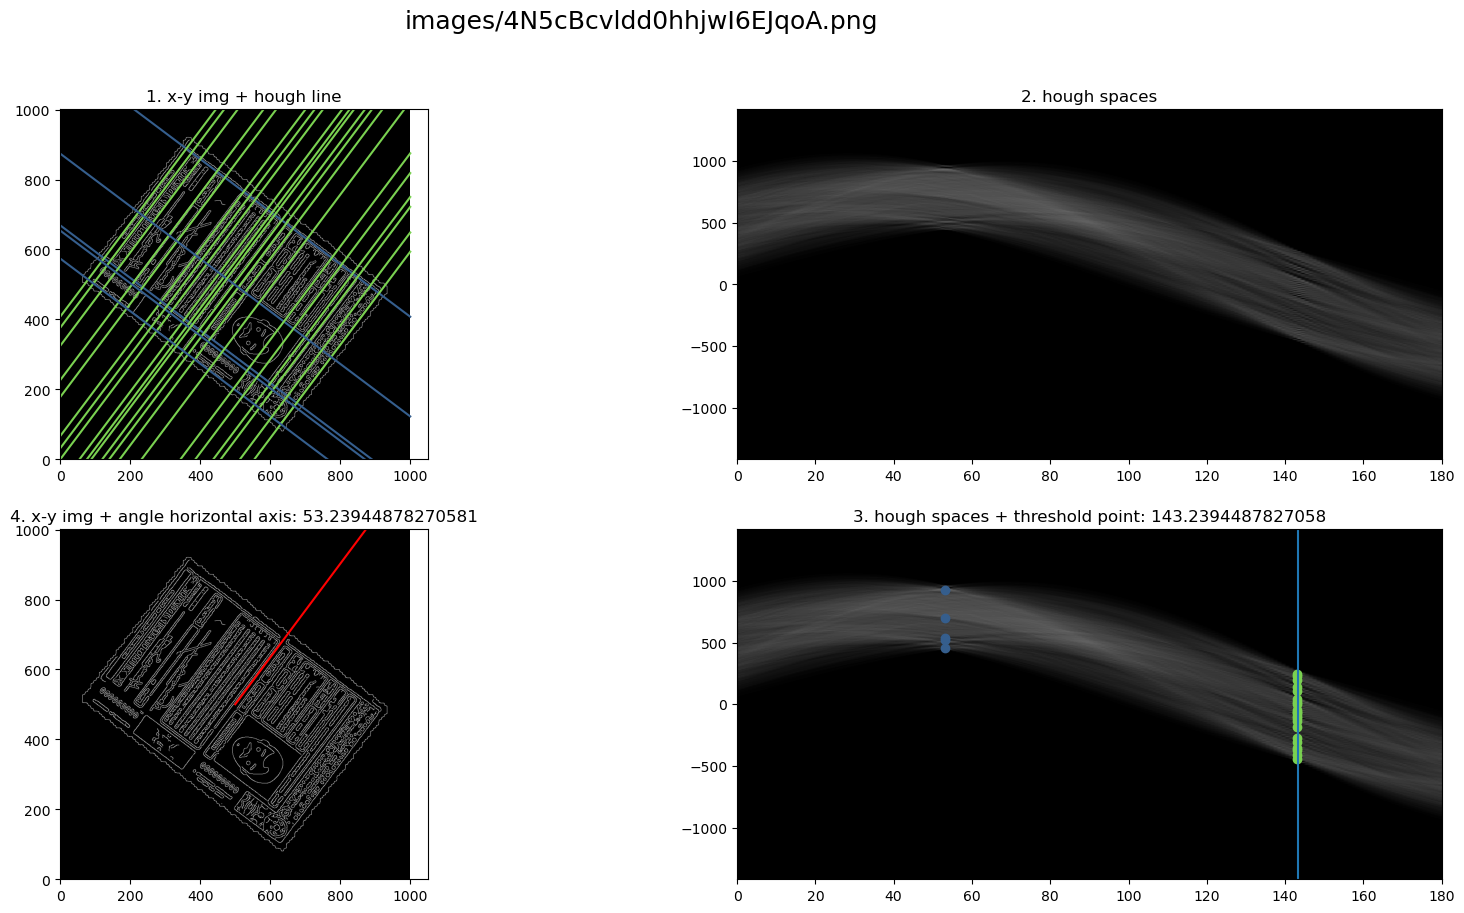

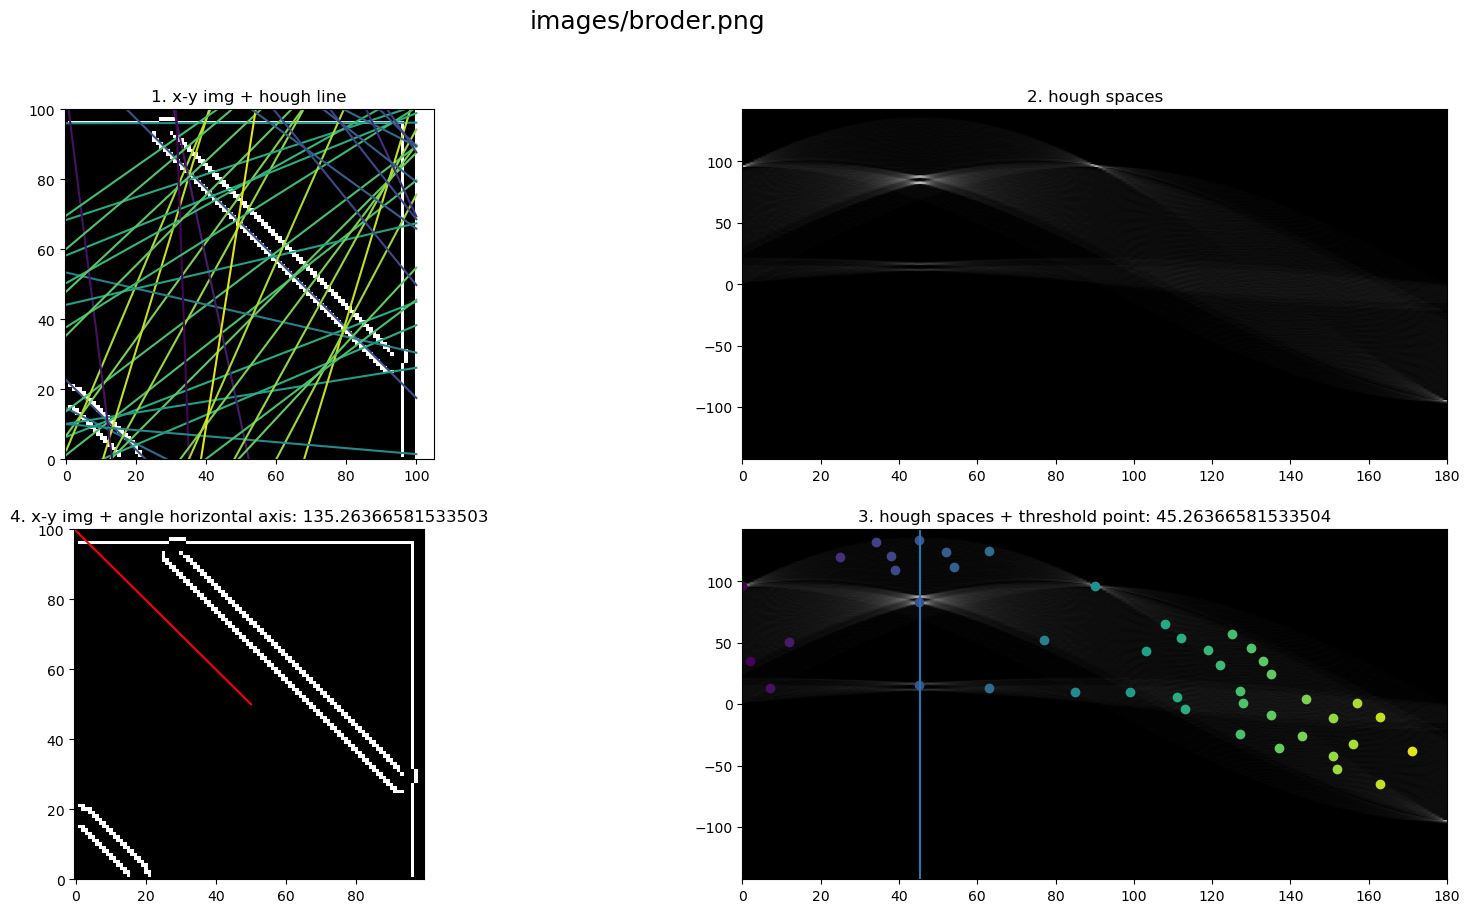

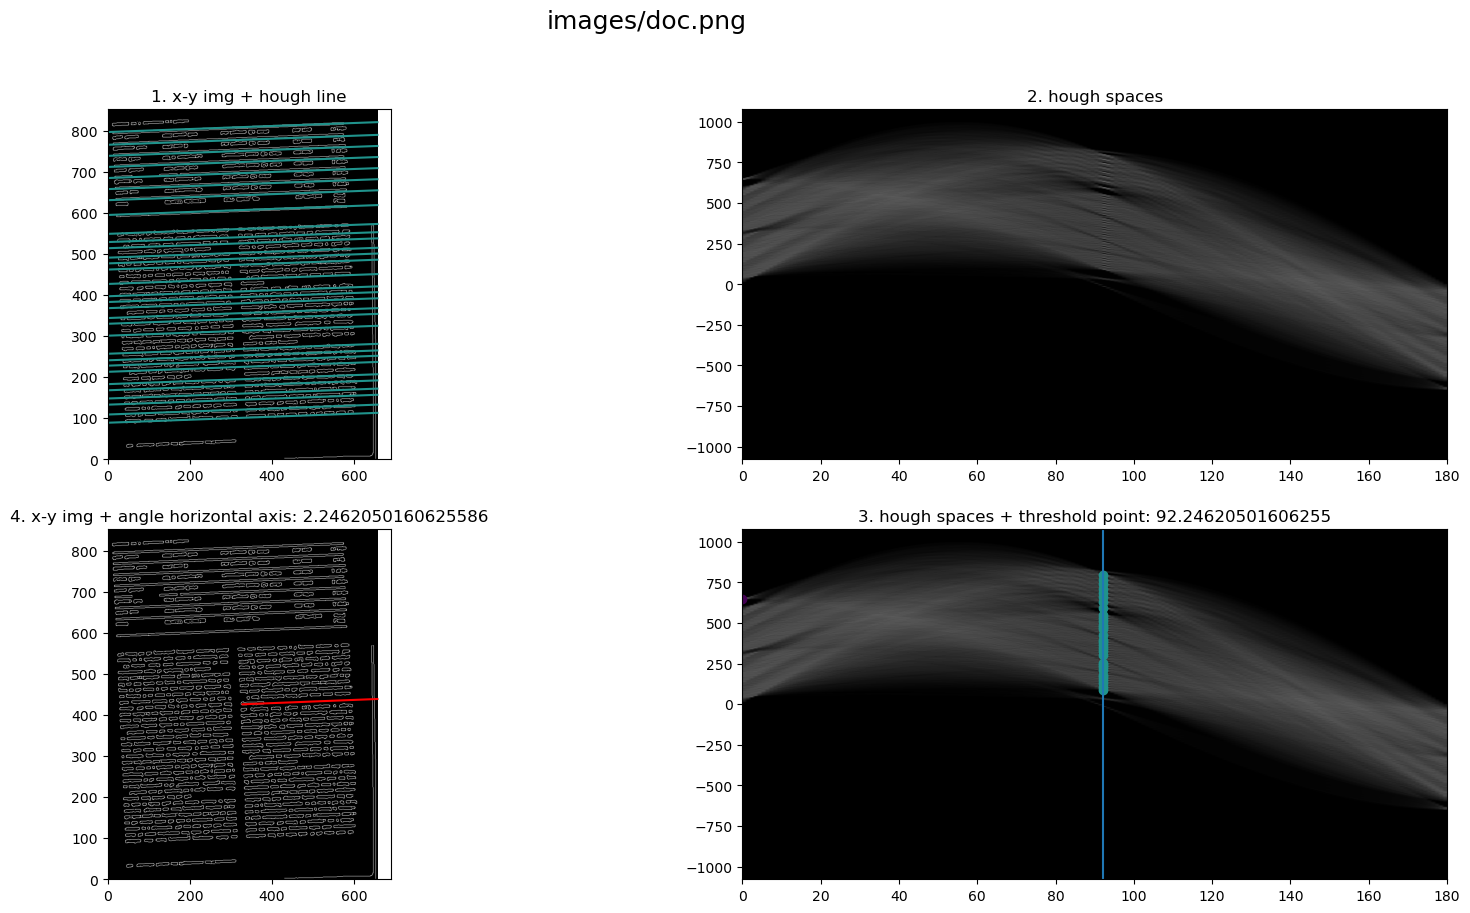

In [20]:
from scipy.stats import mode
from skimage.transform import hough_line_peaks

cached_angle_most = {}

for name,(h, a, d) in cached_hough_space.items():
    start = time.time()

    img = cached_img_preprocess[name]
    img_size_h,img_size_w = img.shape[:2]

    most_common_count = 0
    start = 0.5

    while start > 0 and np.all(most_common_count <= 2):
        threshold = start * np.max(h)

        # find line peaks and angles
        accum, angles, dists = hough_line_peaks(h, a, d, threshold=threshold)

        # 0 deg with img.width dist maybe right border
        degs_rounded = np.rad2deg(np.around(angles, decimals=2))
        zero_indices = np.where(degs_rounded == 0)[0]
        greater_indices = np.where(dists[zero_indices] >= 0.90 * img_size_w)[0]
        border_right_indices = zero_indices[greater_indices]
        # border_right_indices = []
        # for idx,(_,angle,dist) in enumerate(zip(accum, angles, dists)):
        #     if np.rad2deg(np.around(angle, decimals=2)) == 0:
        #         if (dist / img_size_w) >= 0.995:
        #             print(f"right border index:{idx} at threshold: {threshold}")
        #             continue
        #     border_right_indices.append(idx)

        # 90 deg with img.height dist maybe bottom border
        degs_rounded = np.rad2deg(np.around(angles, decimals=2))
        ninety_indices = np.where(degs_rounded == 90)[0]
        greater_indices = np.where(dists[ninety_indices] >= 0.90 * img_size_h)[0]
        border_bottom_indices = ninety_indices[greater_indices]

        border_indices = np.concatenate([border_right_indices, border_bottom_indices])
        normal_indices = np.setdiff1d(np.arange(len(angles)), border_indices)

        angles_filtered = angles[normal_indices]
        if len(angles_filtered) ==0:
            most_common_count = 0
        else:
            # round the angles to 2 decimal places and find the most common angle.
            most_common = mode(np.around(angles_filtered, decimals=2), keepdims=True)
            most_common_angle = most_common[0]
            most_common_count = most_common[1]

        start = start - 0.1


    # Image angle is the horizontal axis angle, same as textline-angle
    # textline-angle of left-rotation relative to the x-y vertical-axis
    angle_rad_vertical_axis = most_common_angle[0]

    # convert the x-y vertical-axis left-rotation textline-angle to x-y horizontal-axis left-rotation textline-angle
    # 'a deg +/- 90 deg'
    angle_rad_horizontal_axis = angle_rad_vertical_axis + np.pi/2
    # make it range in 0,pi
    angle_rad_horizontal_axis = angle_rad_horizontal_axis - np.pi if angle_rad_horizontal_axis > np.pi else angle_rad_horizontal_axis
    
    # convert the x-y horizontal-axis left-rotation textline-angle to image horizontal-axis right-rotation angle
    # '360 deg - (a deg +/- 90 deg)' or '- (a deg +/- 90 deg)'
    angle_rag_skew = - angle_rad_vertical_axis - np.pi/2
    # make it range in 0,pi
    angle_rag_skew = np.pi - angle_rad_vertical_axis - ((-np.pi/2) if angle_rad_vertical_axis > np.pi/2 else np.pi/2)

    # convert image horizontal-axis right-rotation textline-angle to deskew textline-angle
    # '- (- (a deg +/- 90 deg_)'
    rotation_rag_deskew = angle_rad_vertical_axis + np.pi/2
    # make it range in 0,pi
    rotation_rag_deskew = rotation_rag_deskew - np.pi if rotation_rag_deskew > np.pi else rotation_rag_deskew

    # convert rad to degree.
    angle_deg = np.rad2deg(angle_rag_skew)
    rotation_deg = np.rad2deg(rotation_rag_deskew)

    end = time.time()
    cached_angle_most[name] = (angle_deg,rotation_deg)


    print("name: ", name, "time: ", "{:.6f} seconds".format(end - start))
    
    classified = np.full(len(angles), 'normal', dtype=object)
    classified[border_right_indices] = 'border_right'
    classified[border_bottom_indices] = 'border_bottom'
    df1 = pd.DataFrame.from_dict({
        'accum': accum,
        'angles': angles,
        'dists': dists,
        'classified': classified
    })
    df1_styler = df1.style.set_table_attributes("style='display:inline'")
    df1_styler.set_caption(f"peak {len(angles)} use threshold: {threshold:.0f} most_common_angle: {most_common_angle}")
    display_html(df1_styler._repr_html_(), raw=True)

    fig = plt.figure(figsize=(20,10))
    fig.suptitle(name, fontsize=18)
    gs = fig.add_gridspec(2,2)

    # create colormap
    cmap = plt.get_cmap('viridis')

    # use colormap for color
    colors = cmap(np.linspace(0, 1, 180))

    img = cached_img_preprocess[name]
    ax = fig.add_subplot(gs[0,0])
    ax.set_title(f"1. x-y img + hough line")
    ax.imshow(img, cmap="gray", aspect='equal')
    ax.set_ylim(0, img.shape[0])
    origin = np.array((0, img.shape[1]))
    for _, angle, dist in zip(accum, angles, dists):
        if np.around(angle, decimals=2) == 0:
            continue
        deg = np.rint(np.rad2deg(angle)).astype(np.int32)
        # each line
        y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
        ax.plot(origin, (y0, y1), '-', color=colors[deg])

    space_flip = np.flip(h, axis=0)
    ax = fig.add_subplot(gs[0,1], aspect='auto')
    ax.set_title("2. hough spaces")
    ax.imshow(space_flip, cmap="gray", aspect='auto', extent=[0, 180, - h.shape[0] / 2, h.shape[0] / 2])

    angle_degree_vertical_axis = np.rad2deg(angle_rad_vertical_axis)
    ax = fig.add_subplot(gs[1,1], aspect='auto')
    ax.set_title(f"3. hough spaces + threshold point: {angle_degree_vertical_axis}")
    ax.imshow(space_flip, cmap="gray", aspect='auto', extent=[0, 180, - h.shape[0] / 2, h.shape[0] / 2])
    for _, angle, dist in zip(accum, angles, dists):
        deg = np.rint(np.rad2deg(angle)).astype(np.int32)
        p = (deg,dist)
        ax.plot(p[0], p[1], 'o', color=colors[deg])
    plt.axvline(angle_degree_vertical_axis)

    # rad = angle_rad_horizontal_axis - np.pi if angle_rad_horizontal_axis > np.pi else angle_rad_horizontal_axis
    # angle_degree_horizontal_axis = np.rad2deg(rad)
    angle_degree_horizontal_axis = np.rad2deg(angle_rad_horizontal_axis)
    ax = fig.add_subplot(gs[1,0])
    ax.set_title(f"4. x-y img + angle horizontal axis: {angle_degree_horizontal_axis}")
    ax.imshow(img, cmap="gray", aspect='equal')
    ax.set_ylim(0, img.shape[0])
    xc = img.shape[1] / 2
    yc = img.shape[0] / 2
    if angle_degree_horizontal_axis > 90 and angle_degree_horizontal_axis < 270:
        # left
        x2 = 0
        b = -xc
    else:
        # right
        x2 = img.shape[1]
        b = xc
    yc2 = b / np.cos(angle_rad_horizontal_axis) * np.sin(angle_rad_horizontal_axis)
    y2 = yc + yc2
    ax.plot((xc, x2), (yc, y2), '-', color='r')

df = pd.DataFrame.from_dict(cached_angle_most, orient='index', columns=['angle degree', 'rotation degree'])
display(df)

## deskew image

name:  images/4.jpg time:  0.005999 seconds
name:  images/4N5cBcvldd0hhjwI6EJqoA.png time:  0.000992 seconds
name:  images/broder.png time:  0.000000 seconds
name:  images/doc.png time:  0.001004 seconds


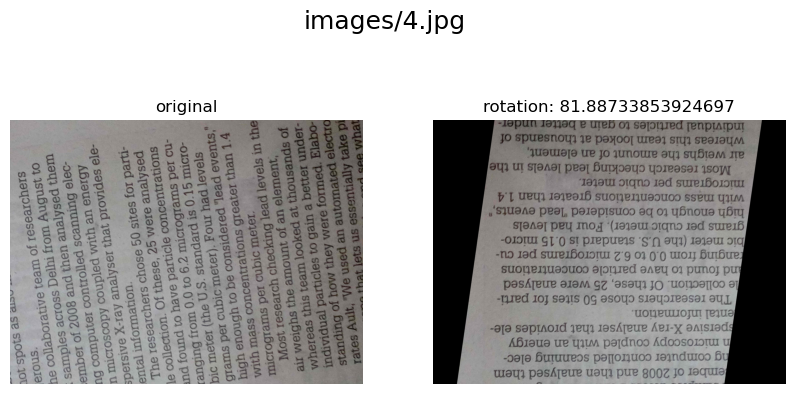

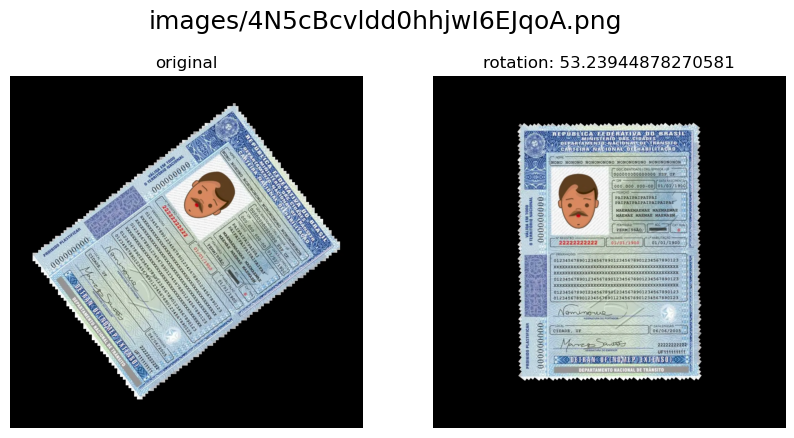

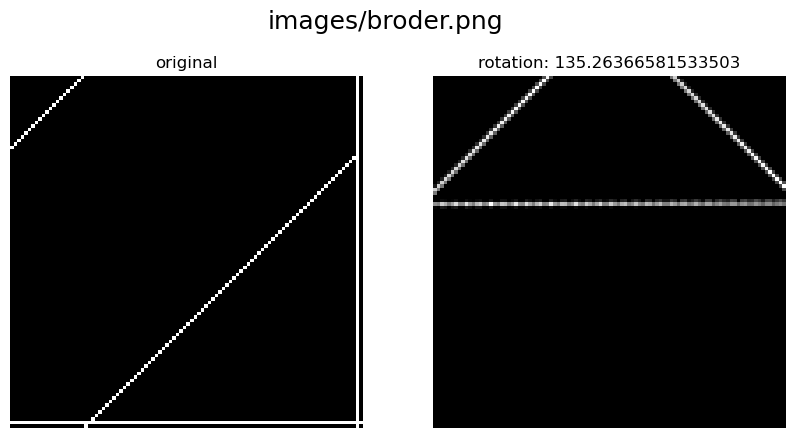

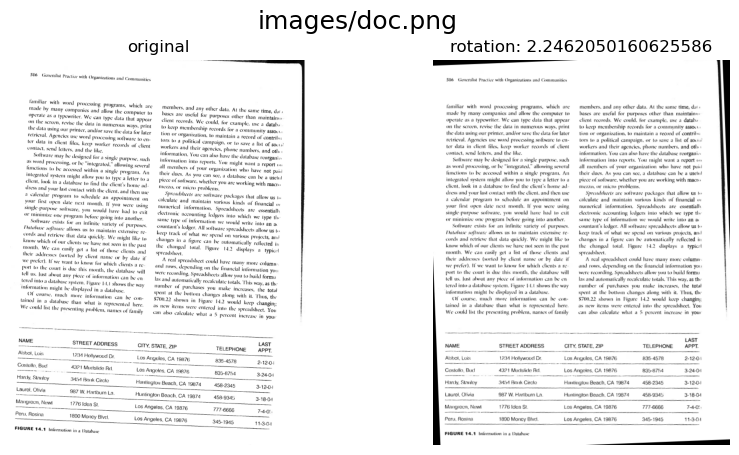

In [21]:
for name,(angle_deg,rotation_deg) in cached_angle_most.items():
    start = time.time()

    img,_ = cached_img_load[name]

    # Rotate original image
    img_center = tuple(np.array(img.shape[1::-1]) / 2)
    rotation_matrix = cv2.getRotationMatrix2D(img_center, rotation_deg, 1.0)
    img_rotated = cv2.warpAffine(img, rotation_matrix, img.shape[1::-1], flags=cv2.INTER_LINEAR)

    end = time.time()


    print("name: ", name, "time: ", "{:.6f} seconds".format(end - start))

    # show the output image
    imgs_show = [
        ("original", img),
        (f"rotation: {rotation_deg}", img_rotated)
    ]
    fig = plt.figure(figsize=(10,5))
    fig.suptitle(name, fontsize=18)
    gs = fig.add_gridspec(1,len(imgs_show))
    for idx, (name,img) in enumerate(imgs_show):
        ax = fig.add_subplot(gs[0, idx])
        ax.set_title(name)
        ax.axis('off')
        ax.imshow(img)
